<a href="https://colab.research.google.com/github/SibeleTatiana/SibeleTatiana/blob/main/kmeans_clustering_for_customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K Means Clustering para Dados de Clientes

### Sobre o conjunto de dados
Este arquivo de entrada contém informações básicas (ID, idade, gênero, renda, pontuação de gastos) sobre os clientes de um shopping.
A Pontuação de Gastos é algo que você atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.


In [1]:
#!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [3]:
df = pd.read_csv('/home/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for null values

In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


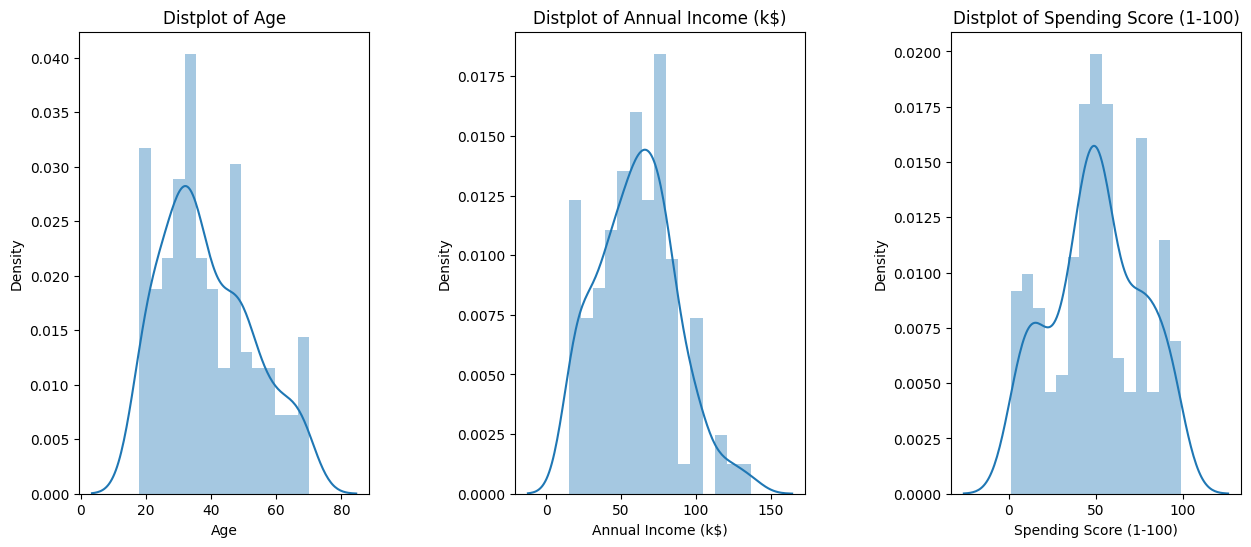

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

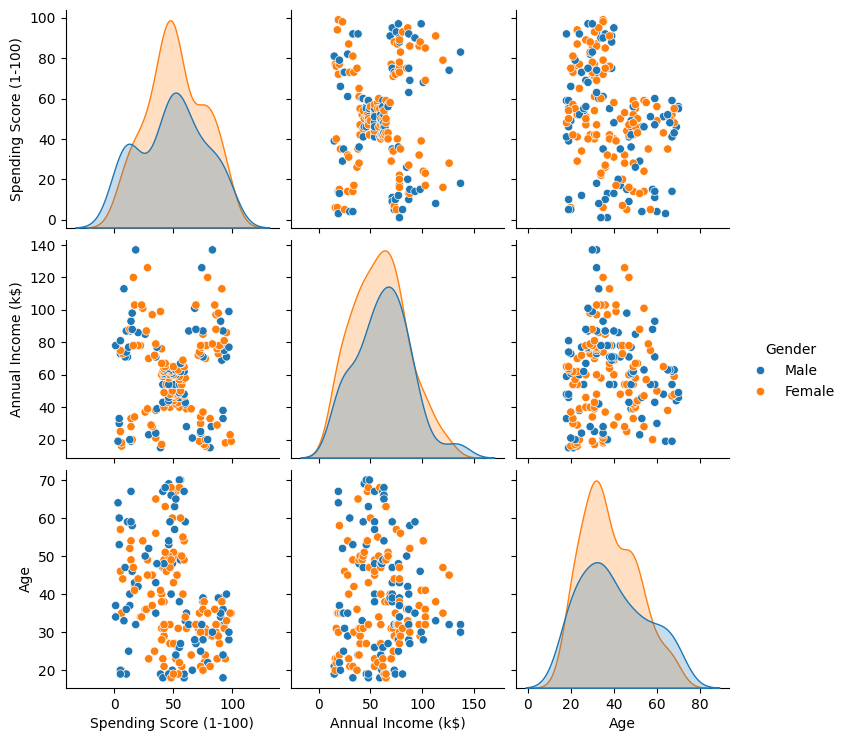

In [9]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

## 2D Clustering based on Age and Spending Score

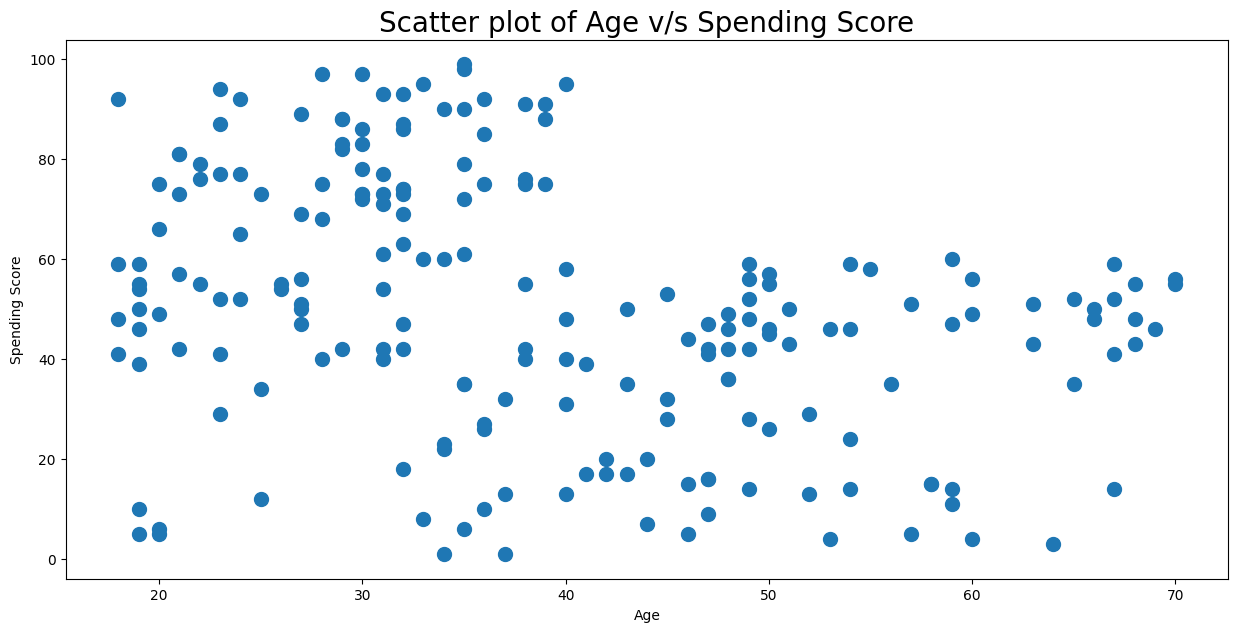

In [10]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

### Deciding K value

In [11]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

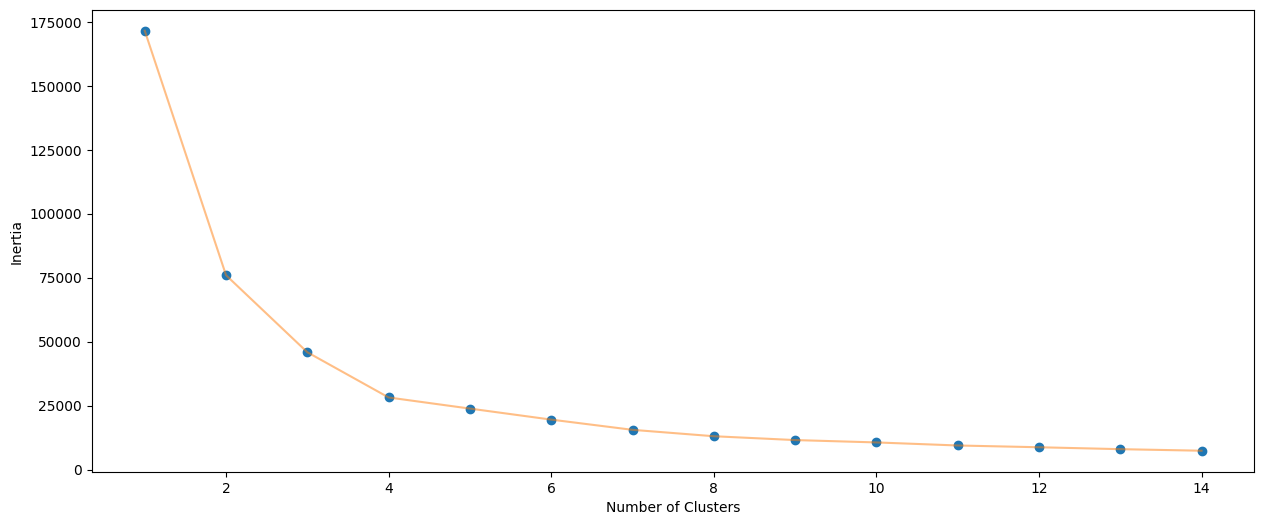

In [12]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Applying KMeans for k=4

n_clusters: Especifica o número de clusters a serem formados.

init: Especifica o método de inicialização. 'k-means++' significa que o algoritmo escolherá os centros de cluster iniciais de forma inteligente para acelerar a convergência.

n_init: Especifica o número de vezes que o algoritmo K-Means será executado com diferentes sementes de centróide. Os resultados finais serão o melhor resultado de n_init execuções consecutivas em termos de inércia.

max_iter: Número máximo de iterações do algoritmo K-Means para uma única execução.

tol: Tolerância para declarar convergência, ou seja, se a mudança nos centróides for menor que esse valor, o algoritmo será interrompido.

random_state: Semente para geração de números aleatórios para garantir a reprodutibilidade.

algorithm: Especifica o algoritmo a ser utilizado. 'elkan' é uma implementação mais eficiente do algoritmo K-Means

In [13]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

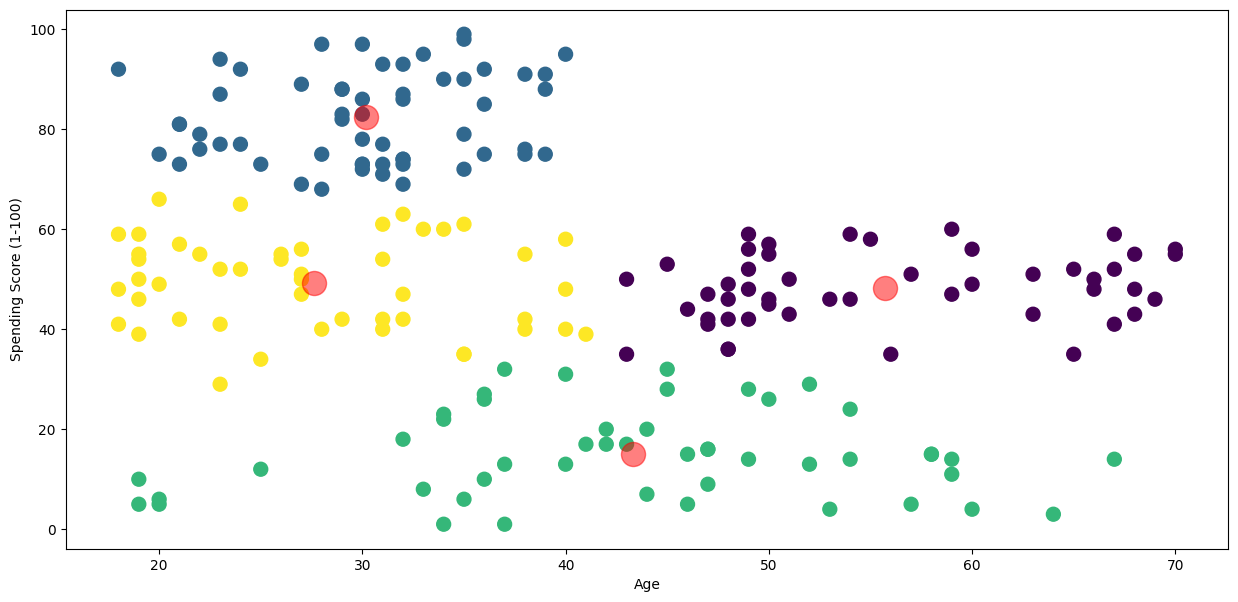

In [14]:
plt.figure(1 , figsize = (15 , 7) )
#plt.clf()


plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### Applying KMeans for k=5

In [15]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001, random_state= 111 , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

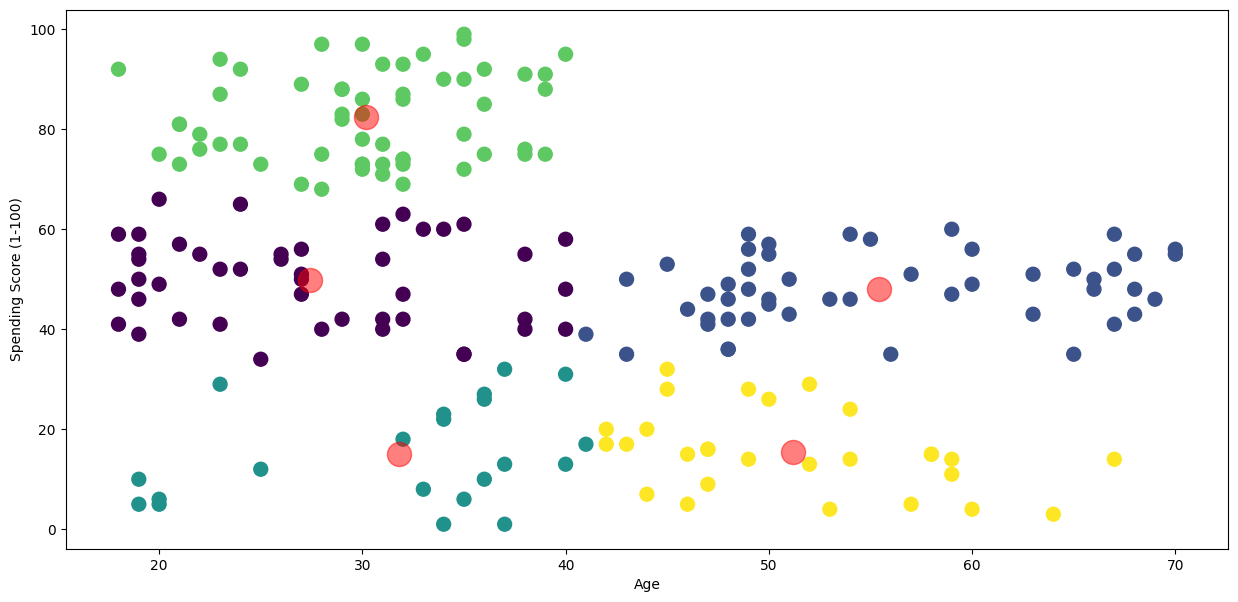

In [16]:
plt.figure(1 , figsize = (15 , 7) )


plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## 2D Clustering based on Annual Income and Spending Score

In [17]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

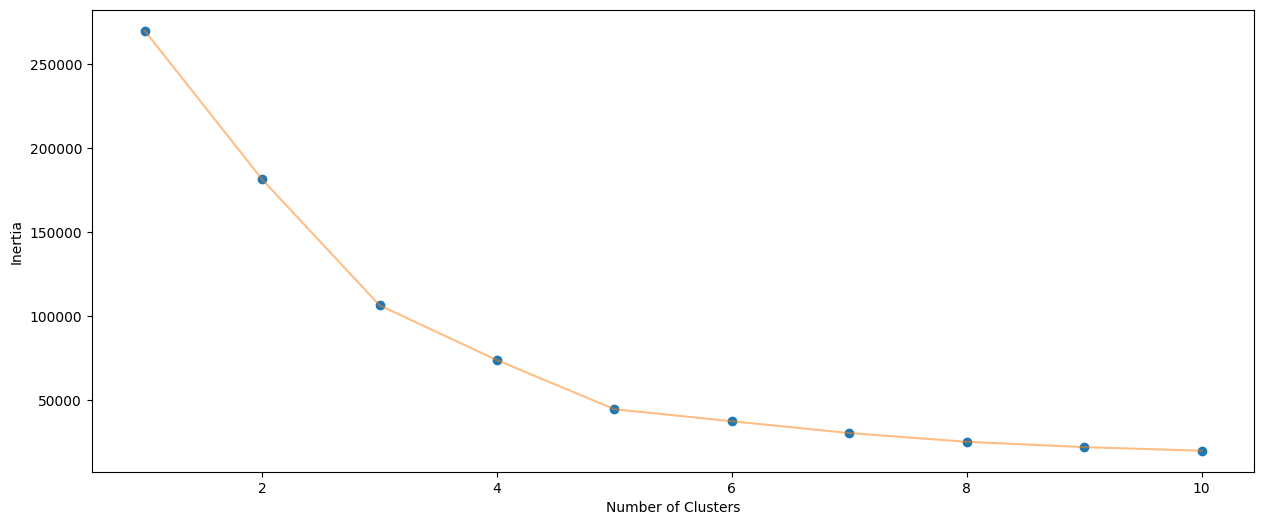

In [18]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [19]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

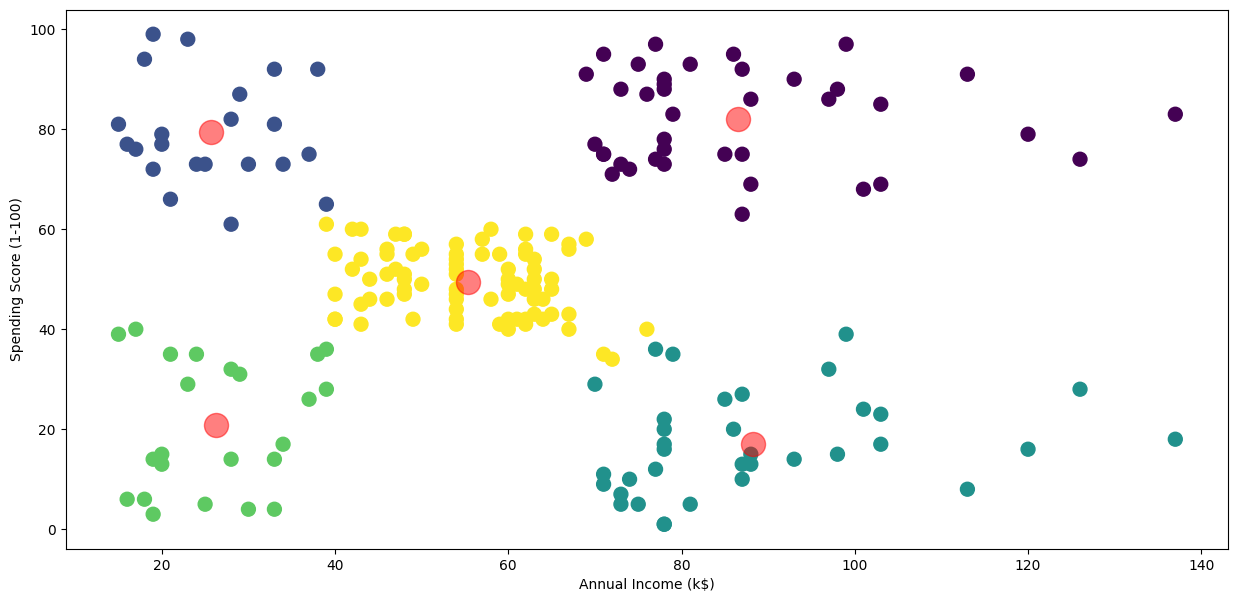

In [20]:
plt.figure(1 , figsize = (15 , 7) )

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

## 3D Clustering Age , Annual Income and Spending Score

In [21]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

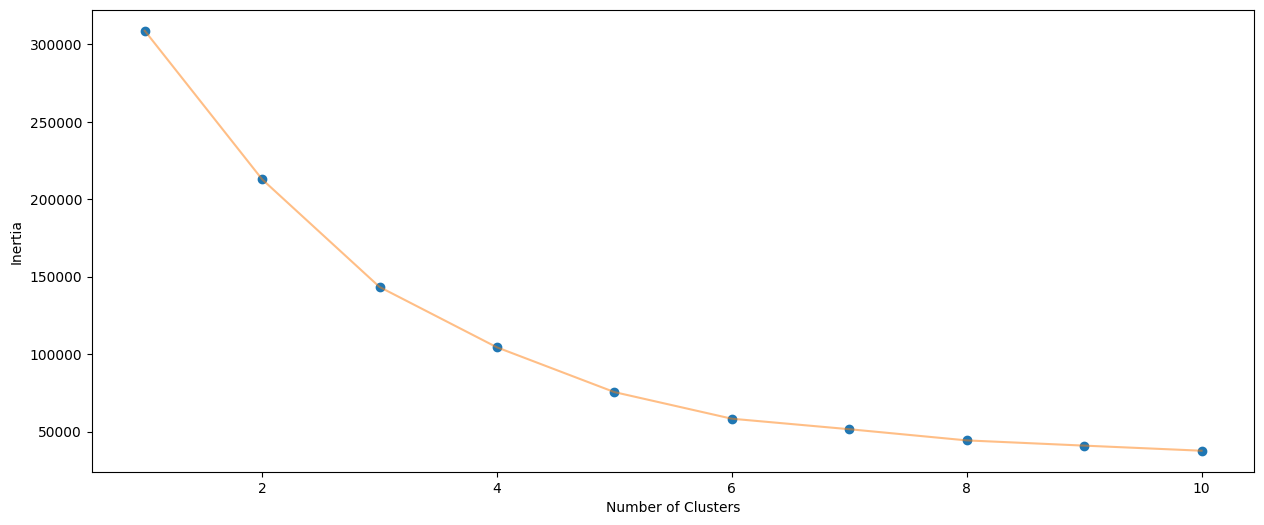

In [22]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [23]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [25]:
import plotly.graph_objs as go
import plotly.io as pio

# Use o renderer do Colab
pio.renderers.default = 'colab'

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['cluster'],
        size=10,
        line=dict(
            color=df['cluster'],
            width=12
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    title='Clusters wrt Age, Income and Spending Scores',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=[trace1], layout=layout)

# Mostra o gráfico diretamente no Colab
fig.show()

In [26]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [27]:
# Agrupa o DataFrame por cluster e aplica o describe() apenas nas colunas numéricas
cluster_describe = df.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

# Mostra a tabela com as estatísticas descritivas por cluster
import pandas as pd
pd.set_option('display.max_columns', None)  # Garante que todas as colunas sejam exibidas
display(cluster_describe)


Age                                                        \
        count       mean        std   min    25%   50%    75%   max   
cluster                                                               
0        35.0  41.685714  10.897305  19.0  35.00  43.0  47.50  59.0   
1        45.0  56.155556   8.543886  43.0  49.00  54.0  65.00  70.0   
2        39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
3        38.0  27.000000   7.032742  18.0  21.00  26.5  31.75  40.0   
4        21.0  44.142857  13.089254  19.0  35.00  45.0  53.00  67.0   
5        22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   

        Annual Income (k$)                                                  \
                     count       mean        std   min    25%   50%    75%   
cluster                                                                      
0                     35.0  88.228571  16.367266  71.0  77.50  85.0  97.50   
1                     45.0  53.377778   8.435016  38.0  47.00  54.0  62.00   
2                     39.0  86.538462  16.312485  69.0  75.50  79.0  95.00   
3                     38.0  56.657895   9.905708  39.0  48.00  59.5  63.75   
4                     21.0  25.142857   7.226934  15.0  19.00  24.0  30.00   
5                     22.0  25.727273   7.566731  15.0  19.25  24.5  32.25   

               Spending Score (1-100)                                          \
           max                  count       mean        std   min   25%   50%   
cluster                                                                         
0        137.0                   35.0  17.285714  10.211215   1.0  10.0  16.0   
1         67.0                   45.0  49.088889   6.251626  35.0  45.0  49.0   
2        137.0                   39.0  82.128205   9.364489  63.0  74.5  83.0   
3         76.0                   38.0  49.131579   7.853975  29.0  42.0  50.0   
4         39.0                   21.0  19.523810  12.769569   3.0   6.0  15.0   
5         39.0                   22.0  79.363636  10.504174  61.0  73.0  77.0   

                      
           75%   max  
cluster               
0        23.50  39.0  
1        55.00  60.0  
2        90.00  97.0  
3        55.00  61.0  
4        31.00  40.0  
5        85.75  99.0

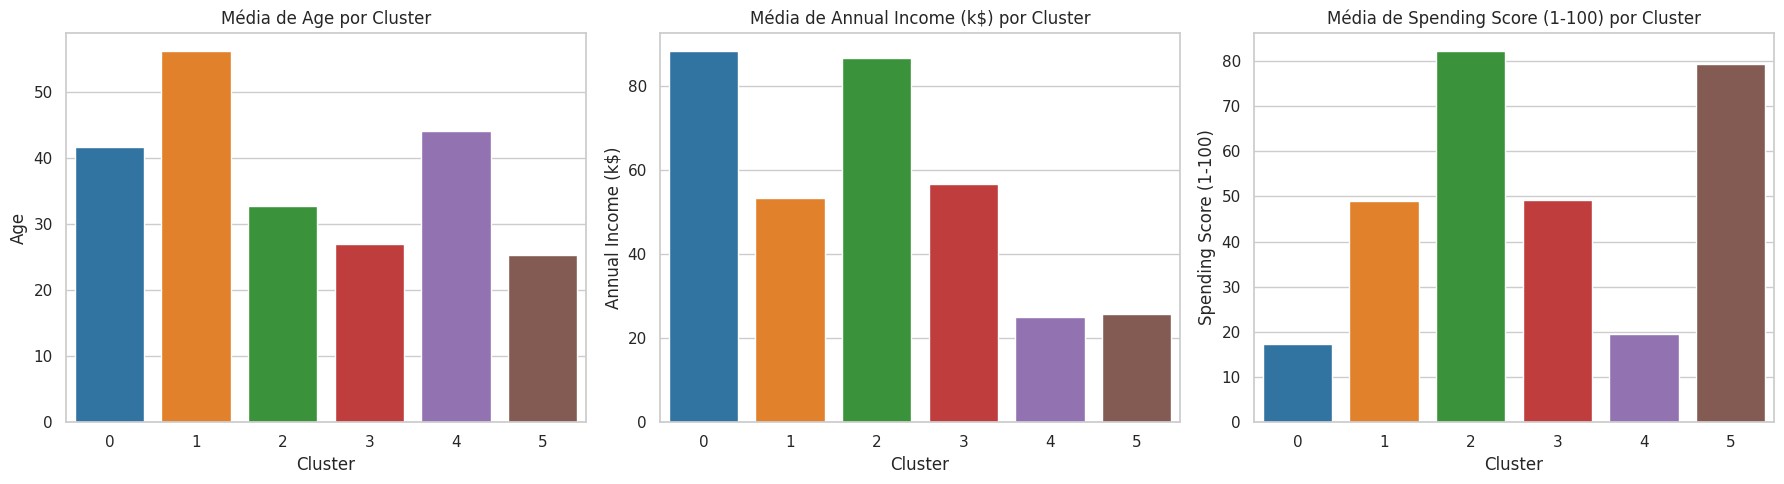

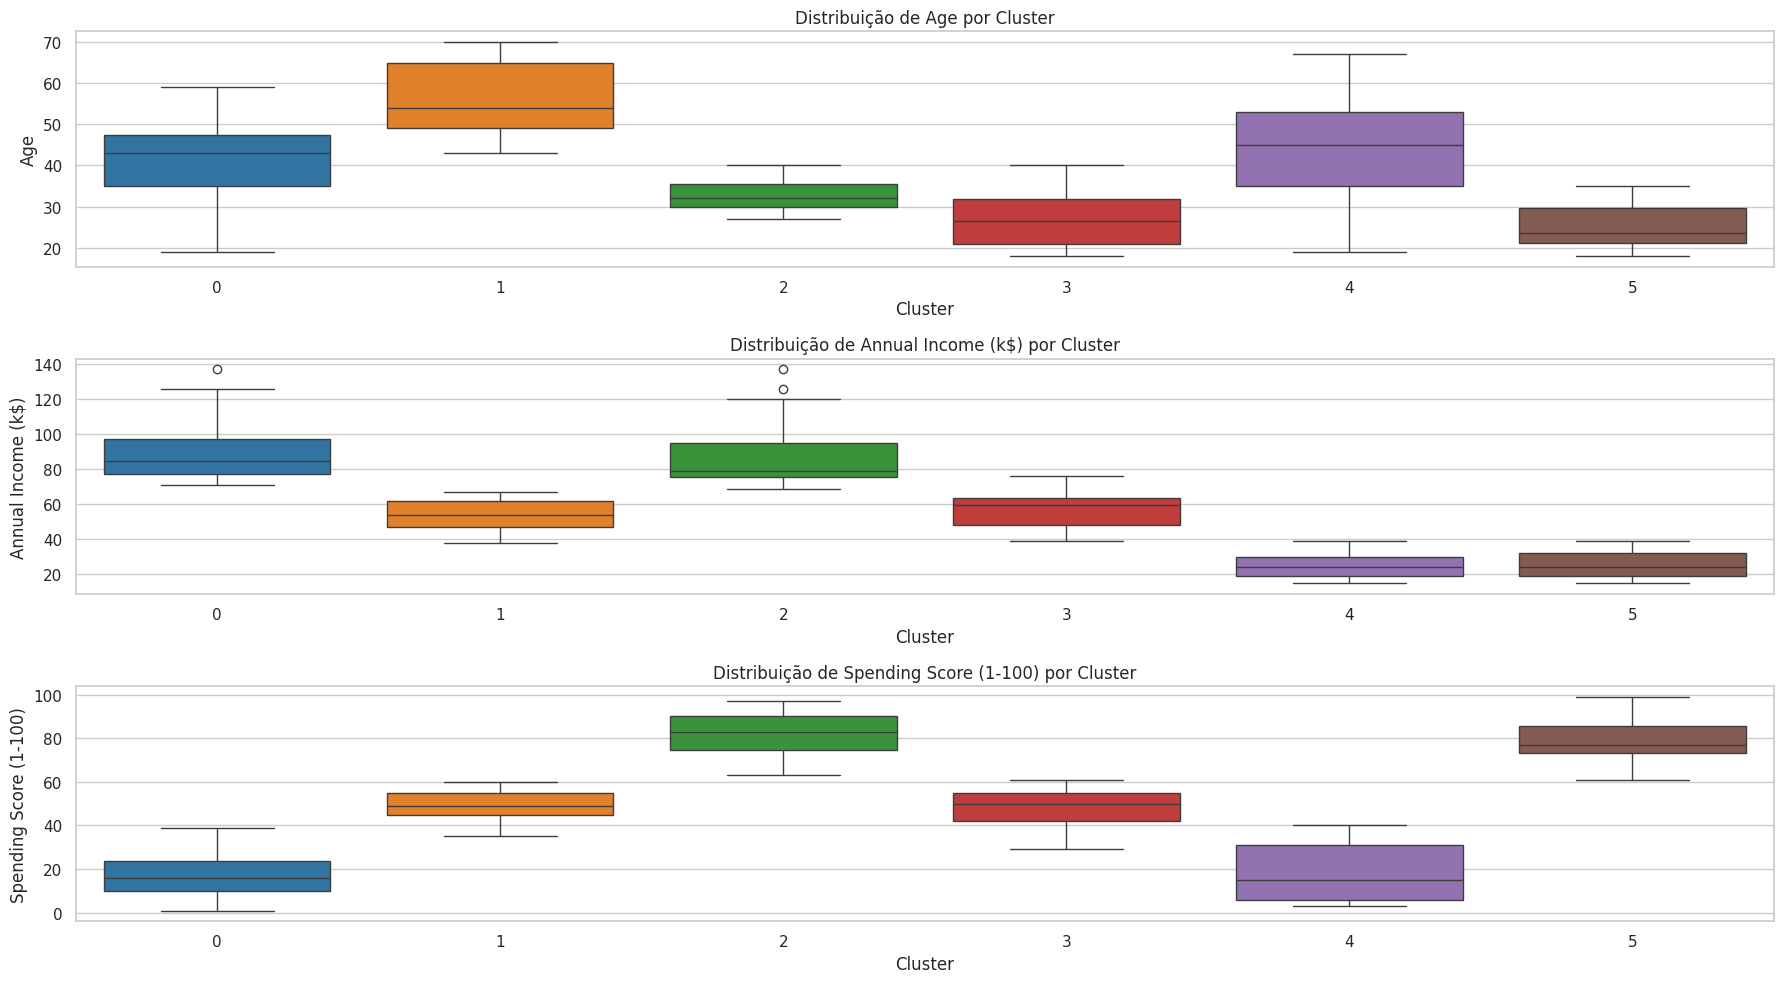

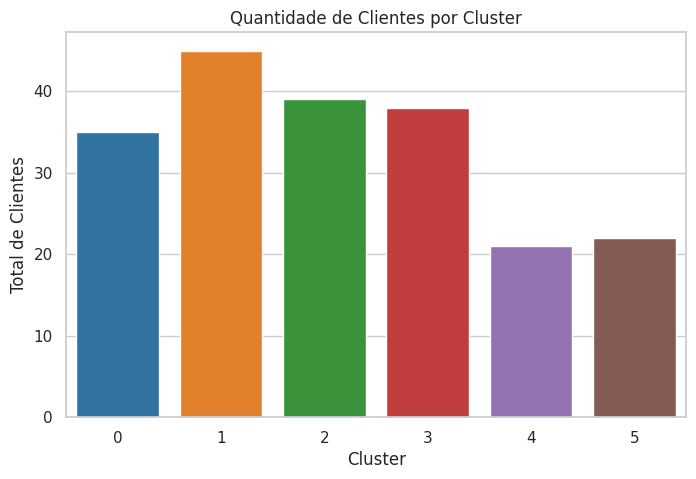

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir visual mais limpo
sns.set(style="whitegrid", palette="pastel")

# Converter cluster para string
df['cluster'] = df['cluster'].astype(str)

# Colunas numéricas para análise
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Definir paleta com base nos clusters únicos (agora strings)
cluster_order = sorted(df['cluster'].unique(), key=int)
num_clusters = len(cluster_order)
palette = sns.color_palette("tab10", num_clusters)
cluster_palette = {str(cluster): palette[i] for i, cluster in enumerate(cluster_order)}

# Figura 1: Médias por cluster
cluster_means = df.groupby('cluster')[numeric_cols].mean().reset_index()

plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.barplot(
        data=cluster_means,
        x='cluster',
        y=col,
        order=cluster_order,
        palette=cluster_palette
    )
    plt.title(f'Média de {col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Figura 2: Boxplots por cluster
plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(
        data=df,
        x='cluster',
        y=col,
        order=cluster_order,
        palette=cluster_palette
    )
    plt.title(f'Distribuição de {col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Figura 3: Contagem de clientes por cluster
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='cluster',
    order=cluster_order,
    palette=cluster_palette
)
plt.title('Quantidade de Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total de Clientes')
plt.show()


In [29]:
df.to_csv("segmented_customers.csv", index = False)